#### Importing Libraries 

In [152]:
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

#### Loading the customer data

In [153]:
# Trying different encodings
encodings = ['ISO-8859-1', 'latin1', 'cp1252', 'utf-16']
for encoding in encodings:
    try:
        df = pd.read_csv('customer_booking.csv', encoding=encoding)
        print('Data loading successful...')
        break  # Break the loop if successful
    except UnicodeDecodeError:
        print(f"Failed to decode with {encoding}")

Data loading successful...


In [154]:
df

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2,Internet,RoundTrip,27,6,9,Sat,PERPNH,Australia,1,0,1,5.62,0
49996,1,Internet,RoundTrip,111,6,4,Sun,PERPNH,Australia,0,0,0,5.62,0
49997,1,Internet,RoundTrip,24,6,22,Sat,PERPNH,Australia,0,0,1,5.62,0
49998,1,Internet,RoundTrip,15,6,11,Mon,PERPNH,Australia,1,0,1,5.62,0


In [155]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

### Data Cleaning and Preprocessing

In [156]:
# checking for missing values 
df.isna().sum()

num_passengers           0
sales_channel            0
trip_type                0
purchase_lead            0
length_of_stay           0
flight_hour              0
flight_day               0
route                    0
booking_origin           0
wants_extra_baggage      0
wants_preferred_seat     0
wants_in_flight_meals    0
flight_duration          0
booking_complete         0
dtype: int64

#### Check for duplicates and remove them 

In [157]:
df = df.drop_duplicates()

#### Standardise or normalise numerical features

In [158]:
#### getting the numerical features
numerical_features = df.select_dtypes(include=['float64', 'int64']).columns
df[numerical_features]

,num_passengers,purchase_lead,length_of_stay,flight_hour,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,262,19,7,1,0,0,5.52,0
1,1,112,20,3,0,0,0,5.52,0
2,2,243,22,17,1,1,0,5.52,0
3,1,96,31,4,0,0,1,5.52,0
4,2,68,22,15,1,0,1,5.52,0
...,...,...,...,...,...,...,...,...,...
49995,2,27,6,9,1,0,1,5.62,0
49996,1,111,6,4,0,0,0,5.62,0
49997,1,24,6,22,0,0,1,5.62,0
49998,1,15,6,11,1,0,1,5.62,0


In [159]:
# standardize using standard scaler
scaler = StandardScaler()
# Using .loc for assignment to avoid SettingWithCopyWarning
df.loc[:, numerical_features] = scaler.fit_transform(df.loc[:, numerical_features])

In [160]:
df[numerical_features]

,num_passengers,purchase_lead,length_of_stay,flight_hour,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,0.403150,1.960824,-0.119827,-0.382535,0.704622,-0.647851,-0.862606,-1.176158,-0.420046
1,-0.580591,0.301703,-0.090269,-1.121490,-1.419200,-0.647851,-0.862606,-1.176158,-0.420046
2,0.403150,1.750668,-0.031153,1.464855,0.704622,1.543565,-0.862606,-1.176158,-0.420046
3,-0.580591,0.124730,0.234868,-0.936751,-1.419200,-0.647851,1.159277,-1.176158,-0.420046
4,0.403150,-0.184973,-0.031153,1.095377,0.704622,-0.647851,1.159277,-1.176158,-0.420046
...,...,...,...,...,...,...,...,...,...
49995,0.403150,-0.638466,-0.504081,-0.013057,0.704622,-0.647851,1.159277,-1.109330,-0.420046
49996,-0.580591,0.290642,-0.504081,-0.936751,-1.419200,-0.647851,-0.862606,-1.109330,-0.420046
49997,-0.580591,-0.671649,-0.504081,2.388550,-1.419200,-0.647851,1.159277,-1.109330,-0.420046
49998,-0.580591,-0.771196,-0.504081,0.356421,0.704622,-0.647851,1.159277,-1.109330,-0.420046


#### Encode categorical variables appropriately

In [161]:
# get the categorical variables 
categorical_features = df.select_dtypes(include = ['object']).columns
categorical_features

Index(['sales_channel', 'trip_type', 'flight_day', 'route', 'booking_origin'], dtype='object')

In [162]:
# Encode using LabelEncoder
label_encoder = LabelEncoder()
# Use .loc for assignment to avoid SettingWithCopyWarning
df.loc[:, categorical_features] = df[categorical_features].apply(lambda col: label_encoder.fit_transform(col.astype(str)))

In [163]:
df[categorical_features]

,sales_channel,trip_type,flight_day,route,booking_origin
0,0,2,2,0,61
1,0,2,2,0,61
2,0,2,6,0,36
3,0,2,2,0,61
4,0,2,6,0,36
...,...,...,...,...,...
49995,0,2,2,720,4
49996,0,2,3,720,4
49997,0,2,2,720,4
49998,0,2,1,720,4


In [164]:
# Desired lower and upper percentile range
desired_lower_range = 1  # Set your desired lower range (e.g., 1 for 1%)
desired_upper_range = 99  # Set your desired upper range (e.g., 99 for 99%)

In [165]:
# Function to calculate lower and upper percentile limits
def calculate_percentile_limits(series, lower_range, upper_range):
    lower_limit = lower_range / 100
    upper_limit = upper_range / 100
    lower_bound = series.quantile(lower_limit)
    upper_bound = series.quantile(upper_limit)
    return lower_bound, upper_bound

#### Address outliers and anomalies (Winsorization)

In [166]:
def winsorize_outliers(series, lower_limit=0.05, upper_limit=0.95):
    lower_bound = series.quantile(lower_limit)
    upper_bound = series.quantile(upper_limit)
    series[series < lower_bound] = lower_bound
    series[series > upper_bound] = upper_bound
    return series

# Use .loc for assignment to avoid SettingWithCopyWarning
df.loc[:, numerical_features] = df[numerical_features].apply(winsorize_outliers)


In [167]:
df[numerical_features]

,num_passengers,purchase_lead,length_of_stay,flight_hour,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,0.403150,1.960824,-0.119827,-0.382535,0.704622,-0.647851,-0.862606,-1.176158,-0.420046
1,-0.580591,0.301703,-0.090269,-1.121490,-1.419200,-0.647851,-0.862606,-1.176158,-0.420046
2,0.403150,1.750668,-0.031153,1.464855,0.704622,1.543565,-0.862606,-1.176158,-0.420046
3,-0.580591,0.124730,0.234868,-0.936751,-1.419200,-0.647851,1.159277,-1.176158,-0.420046
4,0.403150,-0.184973,-0.031153,1.095377,0.704622,-0.647851,1.159277,-1.176158,-0.420046
...,...,...,...,...,...,...,...,...,...
49995,0.403150,-0.638466,-0.504081,-0.013057,0.704622,-0.647851,1.159277,-1.109330,-0.420046
49996,-0.580591,0.290642,-0.504081,-0.936751,-1.419200,-0.647851,-0.862606,-1.109330,-0.420046
49997,-0.580591,-0.671649,-0.504081,1.834333,-1.419200,-0.647851,1.159277,-1.109330,-0.420046
49998,-0.580591,-0.771196,-0.504081,0.356421,0.704622,-0.647851,1.159277,-1.109330,-0.420046


In [168]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 49281 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         49281 non-null  float64
 1   sales_channel          49281 non-null  object 
 2   trip_type              49281 non-null  object 
 3   purchase_lead          49281 non-null  float64
 4   length_of_stay         49281 non-null  float64
 5   flight_hour            49281 non-null  float64
 6   flight_day             49281 non-null  object 
 7   route                  49281 non-null  object 
 8   booking_origin         49281 non-null  object 
 9   wants_extra_baggage    49281 non-null  float64
 10  wants_preferred_seat   49281 non-null  float64
 11  wants_in_flight_meals  49281 non-null  float64
 12  flight_duration        49281 non-null  float64
 13  booking_complete       49281 non-null  float64
dtypes: float64(9), object(5)
memory usage: 5.6+ MB


###  Exploratory Data Analysis (EDA)

#### Summary statistics

In [169]:
print(df.describe())

       num_passengers  purchase_lead  length_of_stay   flight_hour  \
count    49281.000000   49281.000000    49281.000000  49281.000000   
mean        -0.041900      -0.033283       -0.068445     -0.019362   
std          0.829979       0.897044        0.644219      0.935155   
min         -0.580591      -0.892865       -0.592755     -1.490968   
25%         -0.580591      -0.704831       -0.533639     -0.752012   
50%         -0.580591      -0.373007       -0.178943     -0.013057   
75%          0.403150       0.334885        0.146194      0.725899   
max          2.370633       2.237344        1.801442      1.834333   

       wants_extra_baggage  wants_preferred_seat  wants_in_flight_meals  \
count         4.928100e+04          4.928100e+04           4.928100e+04   
mean          1.015040e-16         -9.256477e-17           5.857389e-18   
std           1.000010e+00          1.000010e+00           1.000010e+00   
min          -1.419200e+00         -6.478509e-01          -8.626064e-

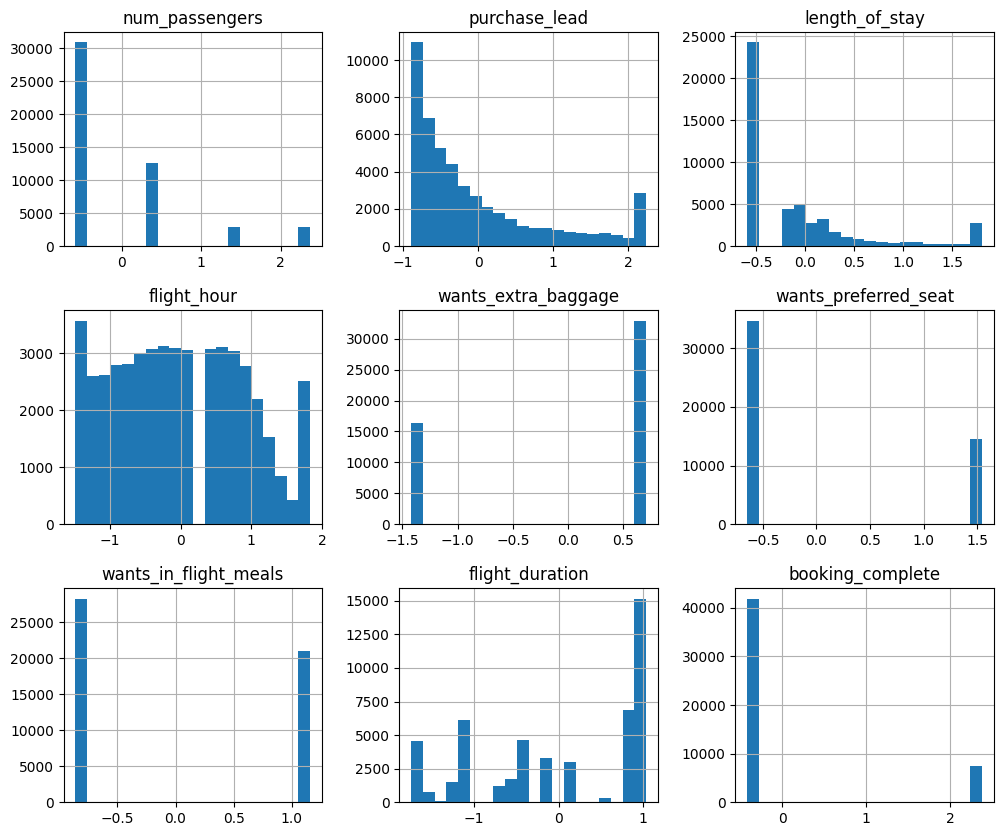

In [170]:
# Distribution of numerical features
df.hist(figsize=(12, 10), bins=20)
plt.show()

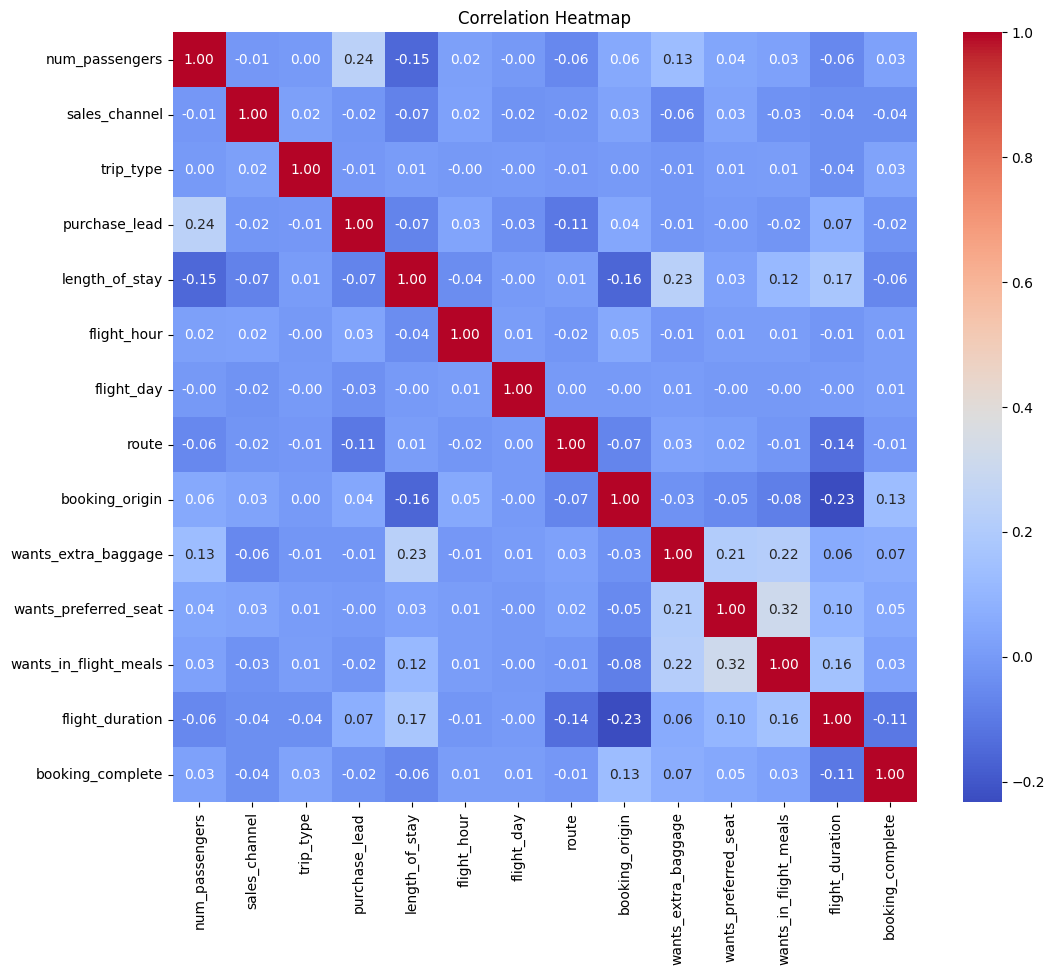

In [173]:
# Correlation heatmap for numerical features
correlation_matrix = df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

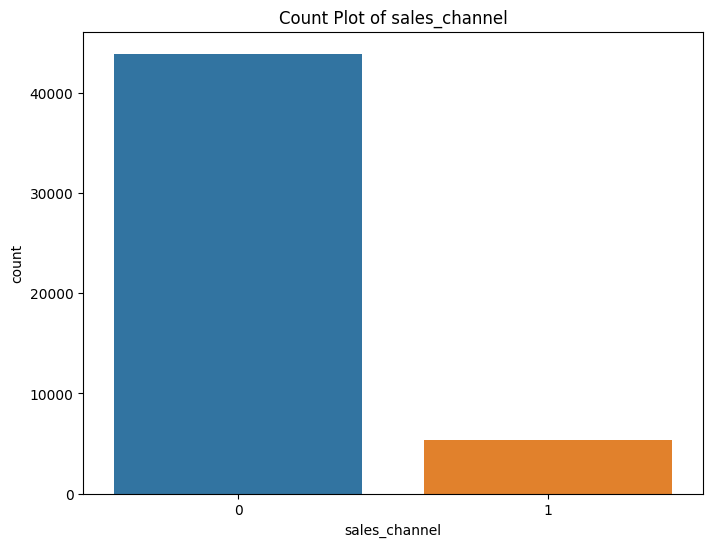

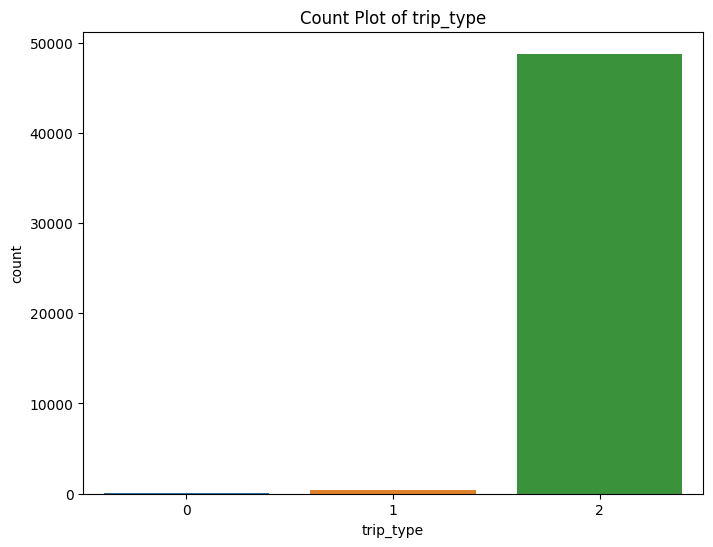

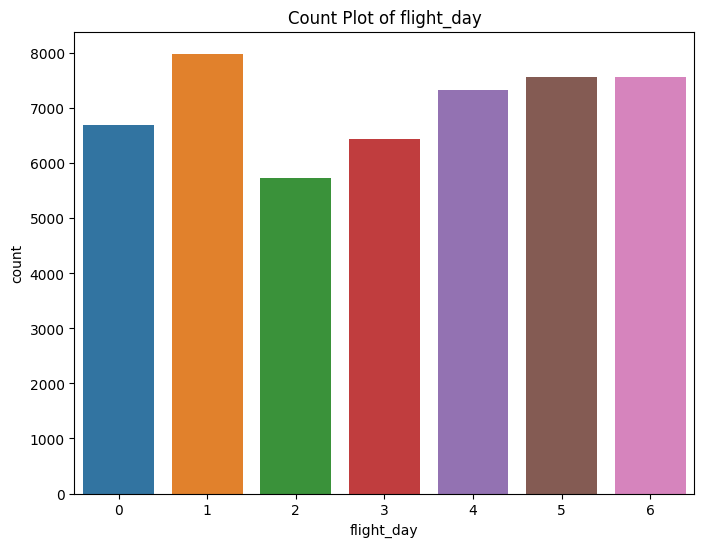

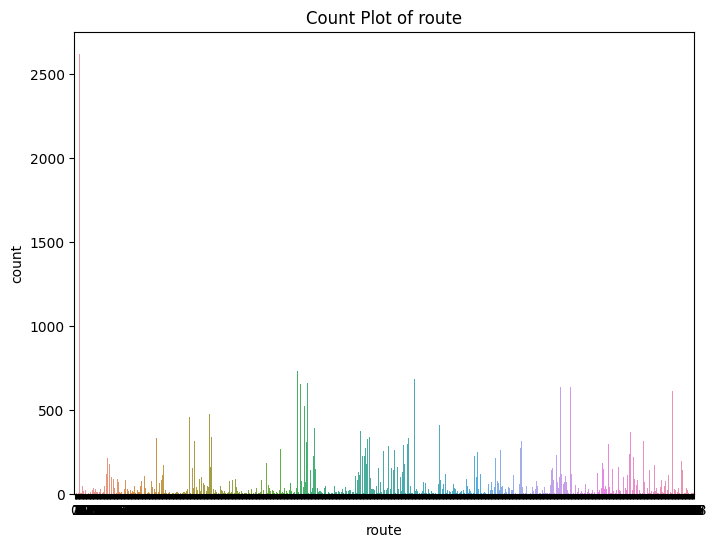

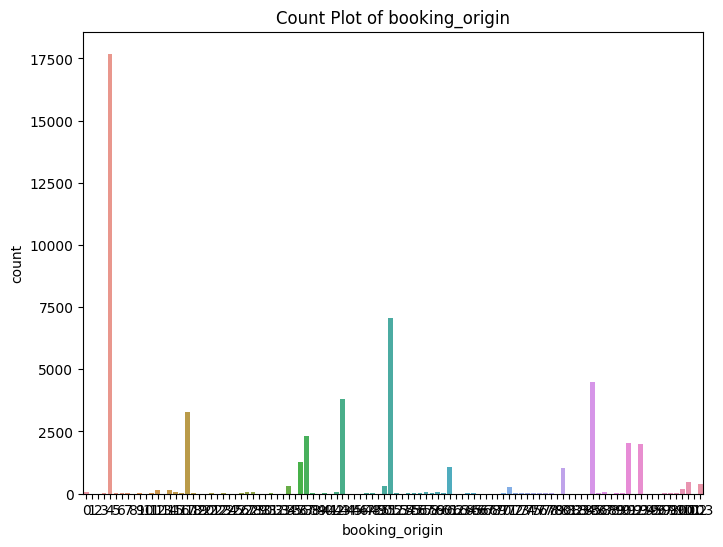

In [176]:
# Count plots for categorical features
for col in df.select_dtypes(include=['object']).columns:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=col, data=df)
    plt.title(f'Count Plot of {col}')
    plt.show()